In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import sklearn
import shap

import scipy.cluster.hierarchy as shc

import explanation_tree as et

/home/inserm/anaconda3/envs/lab2/lib/python3.11/site-packages/shap/utils/_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/inserm/anaconda3/envs/lab2/lib/python3.11/site-packages/shap/utils/_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/inserm/anaconda3/envs/lab2/lib/python3.11/site-packages/shap/utils/_clus

In [2]:
n1 = 300 
r = 0.65 * np.sqrt(np.random.random((n1),))
theta = np.random.random((n1),) * 2 * math.pi

n2 = 50
r2 = 0.2 * np.sqrt(np.random.random((n2),))
theta2 = np.random.random((n2),) * 2 * math.pi

n3 = 100
r3 = 0.2 * np.sqrt(np.random.random((n3),))
theta3 = np.random.random((n3),) * 2 * math.pi

n4 = 100
r4 = 0.1 * np.sqrt(np.random.random((n3),))
theta4 = np.random.random((n3),) * 2 * math.pi

In [3]:
x = r * np.cos(theta)
y = r * np.sin(theta)

x2 = 0.75 + r2 * np.cos(theta2)
y2 = -0.45 + r2 * np.sin(theta2)

x3 = 0 + r3 * np.cos(theta3)
y3 = 0.8 + r3 * np.sin(theta3)

x4 = -0.8 + r4 * np.cos(theta4)
y4 = 0 + r4 * np.sin(theta4)

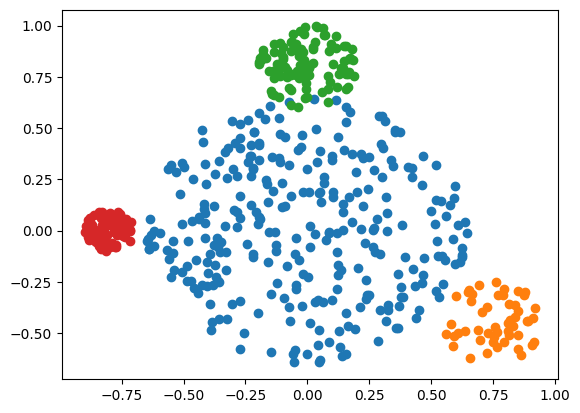

In [4]:
plt.scatter(x,y)
plt.scatter(x2,y2)
plt.scatter(x3, y3)
plt.scatter(x4, y4)

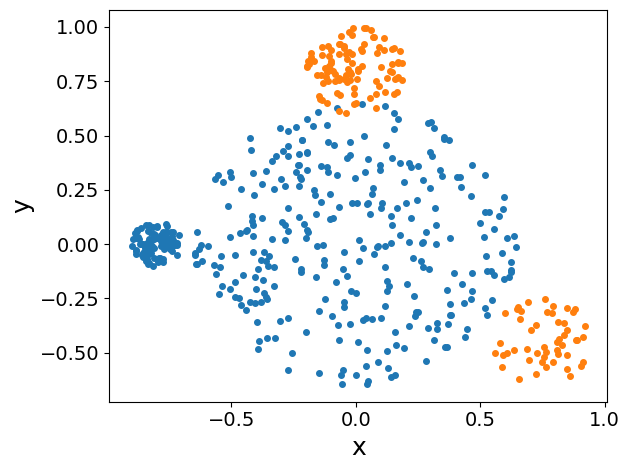

In [5]:
a = pd.DataFrame(np.array([x,y]).T, columns=["x","y"])
b = pd.DataFrame(np.array([x2,y2]).T, columns=["x","y"])
c = pd.DataFrame(np.array([x3,y3]).T, columns=["x","y"])
d = pd.DataFrame(np.array([x4,y4]).T, columns=["x","y"])
X_synth_2 = pd.concat({"a":a,"b":b, "c":c,"d":d}).reset_index().drop("level_1", axis=1).rename({'level_0':'dataset'}, axis=1)
labels = X_synth_2.eval("dataset in ('a','d')")

plt.scatter(X_synth_2.loc[labels,"x"], X_synth_2.loc[labels,"y"],s=16)
plt.scatter(X_synth_2.loc[~labels,"x"], X_synth_2.loc[~labels,"y"], s=16)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
#plt.savefig("figures/toy_example_raw_2.pdf")

In [6]:
from importlib import reload
reload(et)

<module 'explanation_tree' from '/home/inserm/Documents/These/Explanations_exploration/explanation_tree.py'>

In [7]:
clf = sklearn.ensemble.RandomForestClassifier().fit(X_synth_2.loc[:,["x","y"]], labels)

In [8]:
explainer=shap.TreeExplainer(clf, data=X_synth_2.loc[:,["x","y"]], model_output="probability")
synth_explanation = explainer(X_synth_2.loc[:,["x","y"]],y=labels)[:,:,1]

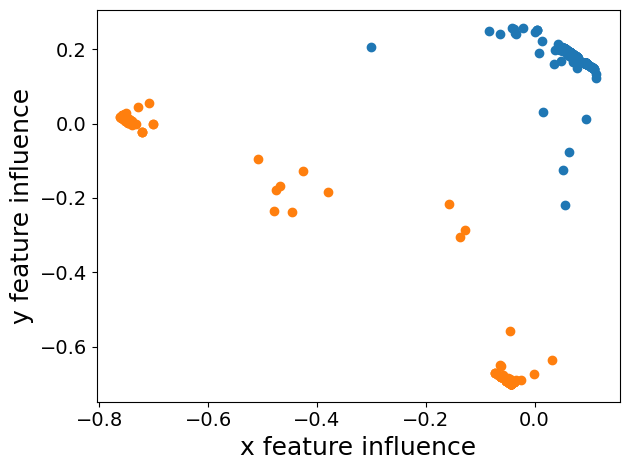

In [9]:
plt.scatter(synth_explanation.values[labels,0],synth_explanation.values[labels,1])
plt.scatter(synth_explanation.values[~labels,0],synth_explanation.values[~labels,1])
plt.xlabel("x feature influence", fontsize=18)
plt.ylabel("y feature influence", fontsize=18)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
#plt.savefig("figures/toy_example_influence_2.pdf")

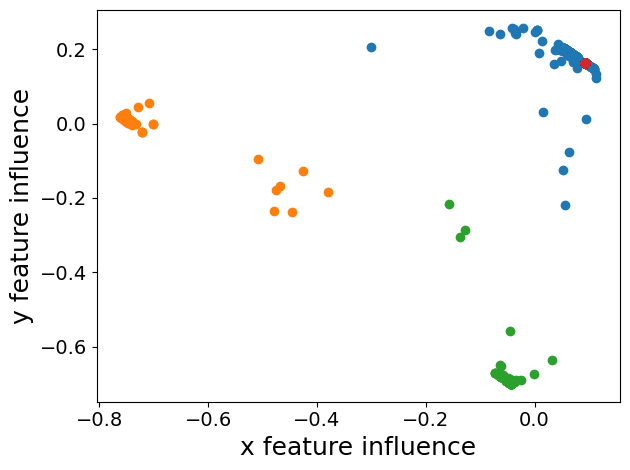

In [10]:
plt.scatter(synth_explanation.values[X_synth_2["dataset"]=="a",0],synth_explanation.values[X_synth_2["dataset"]=="a",1])
plt.scatter(synth_explanation.values[X_synth_2["dataset"]=="b",0],synth_explanation.values[X_synth_2["dataset"]=="b",1])
plt.scatter(synth_explanation.values[X_synth_2["dataset"]=="c",0],synth_explanation.values[X_synth_2["dataset"]=="c",1])
plt.scatter(synth_explanation.values[X_synth_2["dataset"]=="d",0],synth_explanation.values[X_synth_2["dataset"]=="d",1])
plt.xlabel("x feature influence", fontsize=18)
plt.ylabel("y feature influence", fontsize=18)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
#plt.savefig("figures/toy_example_influence_2.pdf")

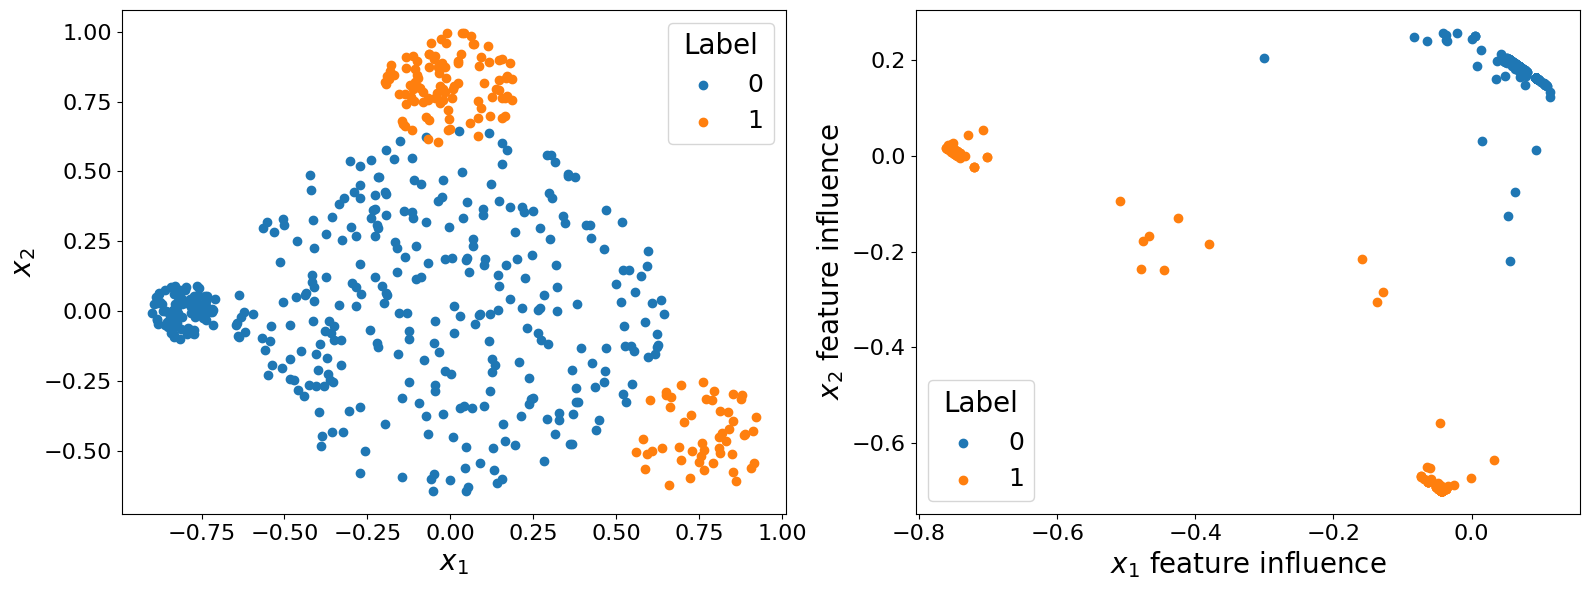

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
axes[0].scatter(X_synth_2.loc[labels,"x"], X_synth_2.loc[labels,"y"], label=0)
axes[0].scatter(X_synth_2.loc[~labels,"x"], X_synth_2.loc[~labels,"y"], label=1)
axes[0].legend(title="Label", title_fontsize=20, fontsize=18)
axes[0].set_xlabel("$x_1$", fontsize=20)
axes[0].set_ylabel("$x_2$", fontsize=20)
axes[0].tick_params(axis='both', labelsize=16)

axes[1].scatter(synth_explanation.values[labels,0],synth_explanation.values[labels,1], label=0)
axes[1].scatter(synth_explanation.values[~labels,0],synth_explanation.values[~labels,1], label=1)
axes[1].legend(title="Label", title_fontsize=20, fontsize=18)
axes[1].set_xlabel("$x_1$ feature influence", fontsize=20)
axes[1].set_ylabel("$x_2$ feature influence", fontsize=20)
axes[1].tick_params(axis='both', labelsize=16)
plt.tight_layout()
#plt.savefig("figures/toy_example/toy_raw_and_influences.pdf")

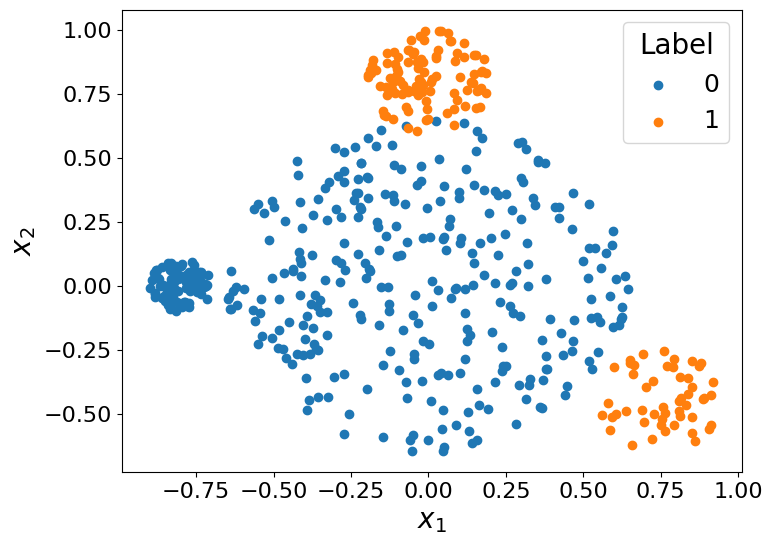

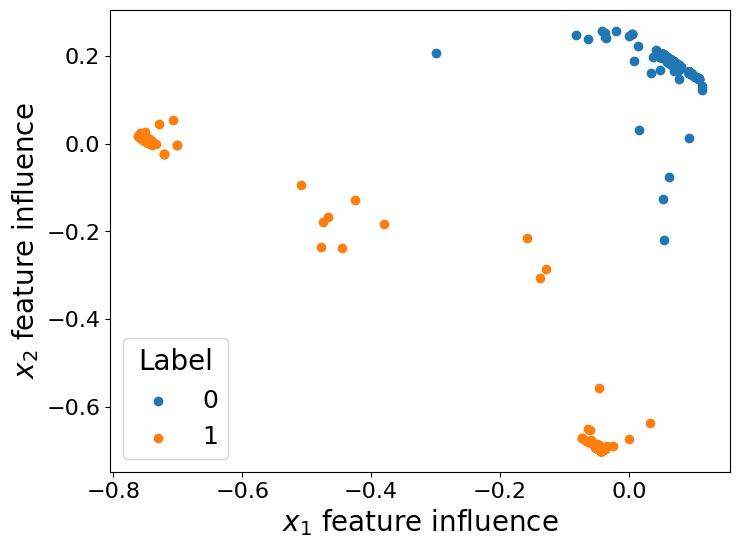

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_synth_2.loc[labels,"x"], X_synth_2.loc[labels,"y"], label=0)
plt.scatter(X_synth_2.loc[~labels,"x"], X_synth_2.loc[~labels,"y"], label=1)
plt.legend(title="Label", title_fontsize=20, fontsize=18)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.tick_params(axis='both', labelsize=16)
#plt.savefig("figures/toy_example/toy_raw.pdf")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(synth_explanation.values[labels,0],synth_explanation.values[labels,1], label=0)
plt.scatter(synth_explanation.values[~labels,0],synth_explanation.values[~labels,1], label=1)
plt.legend(title="Label", title_fontsize=20, fontsize=18)
plt.xlabel("$x_1$ feature influence", fontsize=20)
plt.ylabel("$x_2$ feature influence", fontsize=20)
plt.tick_params(axis='both', labelsize=16)
#plt.savefig("figures/toy_example/toy_influences.pdf")
plt.show()

In [13]:
synth_link = shc.linkage(synth_explanation.values, method='ward', optimal_ordering=True)

In [14]:
dflt_col = "#808080"   # Unclustered gray
cluster_to_color = {1:matplotlib.colors.rgb2hex(matplotlib.cm.get_cmap('tab10', 10)(0)),  # orange
                    0:matplotlib.colors.rgb2hex(matplotlib.cm.get_cmap('tab10', 10)(1))}  # blue
D_leaf_colors = {i:cluster_to_color[labels[i]] for i in X_synth_2.index}

# notes:
# * rows in Z correspond to "inverted U" links that connect clusters
# * rows are ordered by increasing distance
# * if the colors of the connected clusters match, use that color for link
link_cols = {}
for i, i12 in enumerate(synth_link[:,:2].astype(int)):
    c1, c2 = (link_cols[x] if x > len(synth_link) else D_leaf_colors[x]
    for x in i12)
    link_cols[i+1+len(synth_link)] = c1 if c1 == c2 else dflt_col

NameError: name 'matplotlib' is not defined

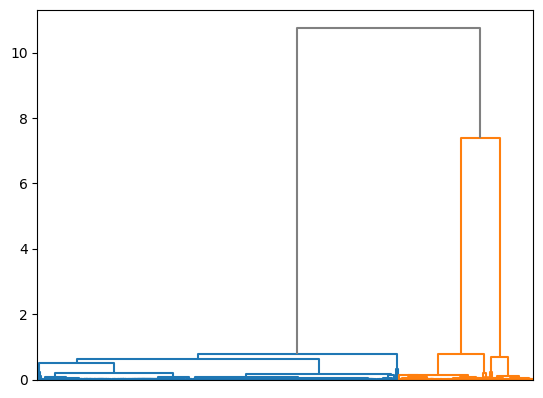

In [ ]:
# Dendrogram
shc.dendrogram(Z=synth_link, link_color_func=lambda x: link_cols[x], no_labels=True);
plt.savefig("figures/toy_example/dendrogram_2.pdf")
#plt.tick_params(axis='both', labelleft=False, left=False)

In [ ]:
labels = shc.fcluster(synth_link, criterion="maxclust", t=3)

In [ ]:
labels0 = shc.fcluster(synth_link, 1, criterion="maxclust")
labels = shc.fcluster(synth_link, 2, criterion="maxclust")
labels2 = shc.fcluster(synth_link, 3, criterion="maxclust")

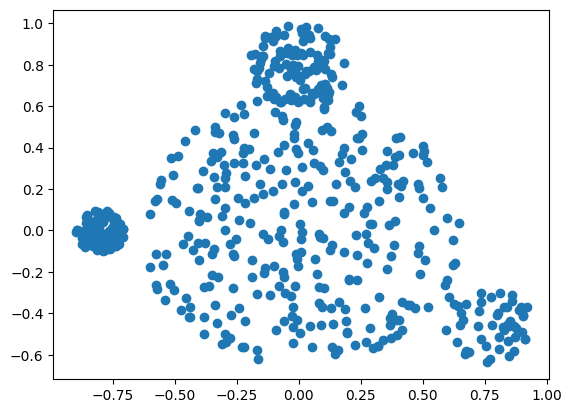

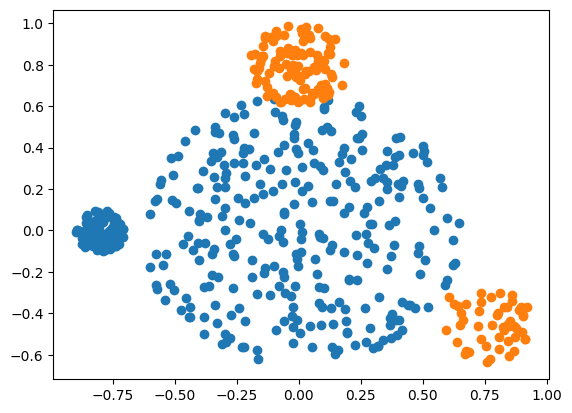

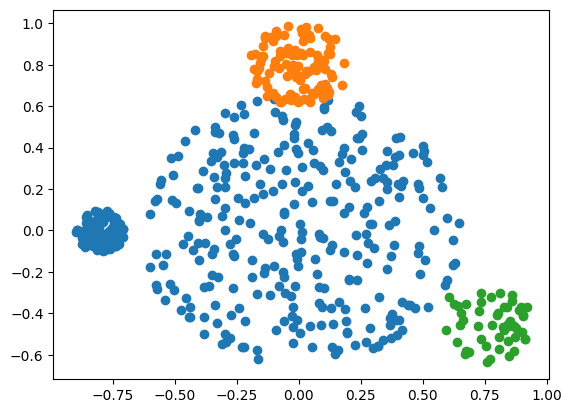

In [ ]:
for l in np.unique(labels0):
    plt.scatter(X_synth_2[l==labels0]["x"], X_synth_2[l==labels0]["y"])
plt.show()
for l in np.unique(labels):
    plt.scatter(X_synth_2[l==labels]["x"], X_synth_2[l==labels]["y"])
plt.show()
for l in np.unique(labels2):
    plt.scatter(X_synth_2[l==labels2]["x"], X_synth_2[l==labels2]["y"])

In [ ]:
dt = sklearn.tree.DecisionTreeClassifier(max_leaf_nodes=2)
dt.fit(X_synth_2[labels1]], labelsdt)

In [ ]:
reload(et)
tree = et.HierarchicalExplanationTree(X_synth_2.loc[:,["x","y"]], synth_explanation, link=synth_link)

In [ ]:
tree.approximate_hc_4(limit=-1)

Approximating hierarchical clustering:   0%|          | 0/547 [00:00<?, ?it/s]

In [ ]:
tree.to_df()

,Parent cluster,Node type,Cluster size,HC Cluster size,Rule,Global F1,Dispersion,Fisher_p,Complete rule
0,-1,Root,550,550,y <= 0.613,1,0.016917,"(0.005050505050505051, 7.332800009845506e-66)",x == x
1,0,Left,446,400,x <= -0.198,0.93617,0.002157,"(0.0, 8.186950761996525e-83)",y <= 0.613
2,0,Right,104,150,y <= 0.638,0.787402,0.035199,"(inf, 5.373804694613067e-12)",y > 0.613
3,2,Left,12,8,y <= 0.632,0.8,0.020927,"(0.0, 0.01785714285714286)",0.613 < y <= 0.638
4,2,Right,92,92,x <= -0.077,1.0,0.001867,"(0.056842105263157895, 5.1475598773306746e-06)",y > 0.638
...,...,...,...,...,...,...,...,...,...
178,153,Right,2,2,None,1.0,0.000000,None,-0.296 < y <= 0.183 and 0.13 < x <= 0.183
179,99,Left,2,2,None,1.0,0.000000,None,-0.241 < y <= -0.194 and x <= -0.198
180,99,Right,1,1,None,1.0,0.000000,None,-0.194 < y <= -0.171 and x <= -0.198
181,104,Left,1,1,None,1.0,0.000000,None,-0.222 < y <= 0.613 and y != -0.14428574004360...


In [ ]:
openml.__version__

'0.14.0'

In [ ]:
tree.plotly_tree_dt_interactive()

0       y<br><=<br>0.613
1      x<br><=<br>-0.198
2       y<br><=<br>0.638
3       y<br><=<br>0.632
4      x<br><=<br>-0.077
             ...        
178                     
179                     
180                     
181                     
182                     
Name: Rule, Length: 183, dtype: object


/home/inserm/anaconda3/envs/lab2/lib/python3.11/site-packages/jupyter_client/session.py:721: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(210,210,…

In [ ]:
tree.prune()

In [ ]:
tree.plotly_tree_dt_interactive()

0      y<br><=<br>0.551
1     x<br><=<br>-0.174
2      y<br><=<br>0.619
3     y<br><=<br>-0.279
4      x<br><=<br>0.475
5                      
6     x<br><=<br>-0.164
7      x<br><=<br>0.181
8                      
9                      
10     y<br><=<br>0.525
11     x<br><=<br>-0.06
12     x<br><=<br>0.423
13                     
14     y<br><=<br>0.629
15    x<br><=<br>-0.216
16                     
17    y<br><=<br>-0.208
18                     
19     x<br><=<br>0.347
20                     
21                     
22    x<br><=<br>-0.152
23    y<br><=<br>-0.144
24                     
25                     
26    y<br><=<br>-0.157
27                     
28     x<br><=<br>-0.06
29                     
30                     
31                     
32                     
33                     
34     x<br><=<br>0.287
35                     
36     y<br><=<br>0.081
37                     
38                     
39    y<br><=<br>-0.122
40     y<br><=<br>0.255
41              

/home/inserm/anaconda3/envs/lab2/lib/python3.11/site-packages/jupyter_client/session.py:721: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



    'data': [{'hoverinfo': 'none',
              'line': {'color': 'rgb(210,210,…

In [ ]:
tree.to_df().head(10)

,Parent cluster,Node type,Cluster size,HC Cluster size,Rule,Global F1,Dispersion,Fisher_p,Complete rule
0,-1,Root,550,550,y <= 0.613,1,0.016917,"(0.005050505050505051, 7.332800009845506e-66)",x == x
1,0,Left,446,400,x <= -0.198,0.93617,0.002157,"(0.0, 8.186950761996525e-83)",y <= 0.613
2,0,Right,104,150,y <= 0.638,0.787402,0.035199,"(inf, 5.373804694613067e-12)",y > 0.613
3,2,Left,12,8,y <= 0.632,0.8,0.020927,"(0.0, 0.01785714285714286)",0.613 < y <= 0.638
4,2,Right,92,92,x <= -0.077,1.0,0.001867,"(0.056842105263157895, 5.1475598773306746e-06)",y > 0.638
5,1,Left,196,224,y <= -0.306,0.933333,0.000733,"(inf, 1.677553392976895e-25)",y <= 0.613 and x <= -0.198
6,1,Right,250,172,x <= 0.583,0.815166,0.002491,"(0.0, 1.2806678651787457e-12)",y <= 0.613 and x > -0.198
7,6,Left,193,165,x <= 0.183,0.921788,0.001010,"(39.30357142857143, 2.4617243222310464e-18)",y <= 0.613 and -0.198 < x <= 0.583
8,6,Right,57,7,x <= 0.638,0.21875,0.025168,"(0.0, 0.14285714285714285)",y <= 0.613 and x > 0.583
9,8,Left,9,6,y <= -0.251,0.8,0.013581,"(inf, 0.3333333333333333)",y <= 0.613 and 0.583 < x <= 0.638


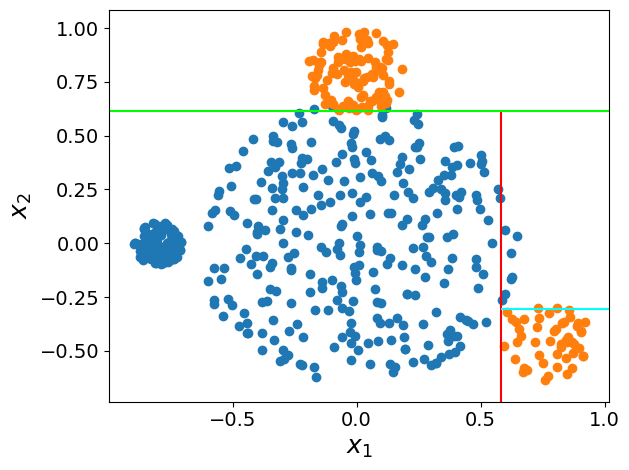

In [ ]:
graph_x_min = X_synth_2["x"].min()-0.1
graph_x_max = X_synth_2["x"].max()+0.1
graph_y_min = X_synth_2["y"].min()-0.1
graph_y_max = X_synth_2["y"].max()+0.1

plt.scatter(X_synth_2.loc[labels,"x"], X_synth_2.loc[labels,"y"])
plt.scatter(X_synth_2.loc[~labels,"x"], X_synth_2.loc[~labels,"y"])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18)
plt.hlines(y=0.613, xmin=graph_x_min, xmax=graph_x_max, color="#00FF00")
plt.vlines(x=0.583, ymin=graph_y_min, ymax=0.609, color="#FF0000")
#plt.hlines(y=0.636, xmin=graph_x_min, xmax=graph_x_max, color="yellow")
plt.hlines(y=-0.306, xmin=0.583, xmax=graph_x_max, color="#00FFFF")
plt.xlim([graph_x_min, graph_x_max])
plt.ylim([graph_y_min, graph_y_max])
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.savefig("figures/toy_example/toy_data_split.pdf", bbox_inches='tight')